<a href="https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/COMP90049/Week%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### The University of Melbourne, School of Computing and Information Systems
# COMP90049 Introduction to Machine Learning

## Week 4 - Nearest Neighbors & Optimization

Today, we will be learning about:
- K-Nearest Neighbour and Distance Metrics
- Optimization, concept of MLE

Up until today, you should be able to do the maths for the following examinables:
- Calculate probabilites
- Train and test model BY HAND for:
  - Naive Bayes and friends
  - Decision Trees
  - KNN
- Discretisation: equal width, equal frequency, k-means
- Evaluation metrics: percision, recall, f-score, micro/macro average
- Uncertainty: Mean Info, Info Gain, Entropy

---
## Theoretical Questions

### Question 1

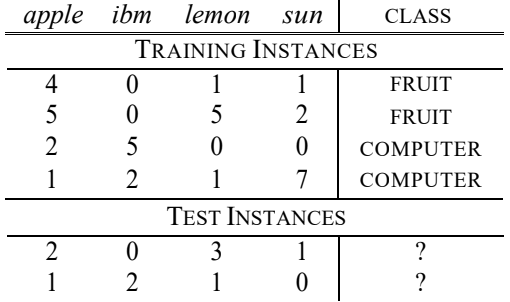

#### (a) Classify with 1-NN (Euclidean distance)

Apply this formula $d(A,B) = \sqrt{\sum_k |a_k-b_k|^2}$ you should obtain:
- $d(T_1, A) = \sqrt{(2 − 4)^2 + (0 − 0)^2 + (3 − 1)^2 + (1 − 1)^2} = \sqrt{8}$
- $d(T_1, B) = \text{I'm too lazy to type these out} = \sqrt{14}$
- $d(T_1, C) = \text{I'm too lazy to type these out} = \sqrt{35}$
- $d(T_1, D) = \text{I'm too lazy to type these out} = \sqrt{45}$

The nearest neighbor is A (labelled `FRUIT`) so we label the 1st test instance as `FRUIT`.

In a similar fashion you should get C as the nearest neighbor to the 2nd test instance, which means you label it as `COMPUTER`.

Anyway this is the full result if you want to check your maths

Euclidean Distance|A|B|C|D
---|---|---|---|---
1st test instance|2.8|3.7|5.9|6.7
2nd test instance|3.7|6.3|3.3|7

#### (b) Classify with 3-NN (Manhattan distance)

Apply this formula $d(A,B) = \sum_k |a_k-b_k|$ you should obtain:

Manhattan Distance|A|B|C|D
---|---|---|---|---
1st test instance|4|6|9|11
2nd test instance|6|12|5|7

- 1st instance's 3NN: A,B,C
- 2nd instance's 3NN: A,C,D

##### Majority class
- 1st instance: A,B,C are 2 `Fruit` and 1 `Computer` ▶ `Fruit`
- 2nd instance: A,C,D are 2 `Computer` and 1 `Fruit` ▶ `Computer`

##### Inverse distance (ϵ = 1)

First calculate the weights:

Weighting|Instance A|Instance B|Instance C|Instance D
---|---|---|---|---
1st test instance|$\frac{1}{4+1}$ = 0.2|$\frac{1}{6+1}$ = 0.14|$\frac{1}{9+1}$ = 0.1|Not NN
2nd test instance|$\frac{1}{5+1}$ = 0.17|Not NN|$\frac{1}{6+1}$ = 0.14|$\frac{1}{7+1}$ = 0.12

Then add the weights up to get the result:

Total weighted distance|`FRUIT`|`COMPUTER`|Result
---|---|---|---
1st test instance|0.2+0.14=0.34|0.1|`FRUIT`
2nd test instance|0.17|0.14+0.12=0.26|`COMPUTER`

##### Inverse linear distance

We have 3 NN, so the weight formula will be $w_j = \frac{d_3-d_j}{d_3-d_1}$

First calculate the weights:

Weighting|Instance A|Instance B|Instance C|Instance D
---|---|---|---|---
1st test instance| $\frac{9-4}{9-4}$ = 1|$\frac{9-6}{9-4}$ = 0.6|$\frac{9-9}{9-4}$ = 0|Not NN
2nd test instance| $\frac{7-5}{7-5}$ = 1|Not NN|$\frac{7-6}{7-5}$ = 0.5|$\frac{7-7}{7-5}$ = 0

Then add the weights up to get the result:

Total weighted distance|`FRUIT`|`COMPUTER`|Result
---|---|---|---
1st test instance|1+0.6=1.6|0|`FRUIT`
2nd test instance|1|0.5+0=1|`FRUIT`

#### (c) Can we do KNN with cosine similarity?
Yes, this works well as a weighting function where you can sum the cosine similarity up (your job: come up with proper reasons to explain this)

In case you forget, this is how you do it: $cos(A,B) = \frac{\sum_i A_iB_i}{\sqrt{\sum_i A_i^2 \sum_i B_i^2}}$

Think of features represented as a n-D space vector coming from the origin. The cosine similarity measures an angle between 2 vectors. In what cases would it not work?

Hint: --->----->

### Question 2: What is “likelihood”? Define it in the context of “Maximum Likelihood Optimization”.

- Likelihood: a measure of how well a set of model parameters explains or accounts for the observed data.
- **Maximum Likelihood** Estimation (MLE): find set of **model parameters** that make the observed data **most probable**.
- Likelihood in MLE: how probable the observed data is under the assumptions of the model.

#### Boring part
Mathematically, the likelihood function is formulated as the product (or sum, depending on whether you're dealing with probabilities or log-likelihoods) of the individual data point probabilities:

$$\underbrace{L(𝜃|𝐷)}_{Likelihood}=𝑃(𝐷|𝜃)=𝑃(𝑥_1|𝜃)×⋯×𝑃(𝑥_n|𝜃) \tag{original}$$

$$\underbrace{{𝐿𝑜𝑔\;}{L(𝜃|𝐷)}}_{Log-likelihood}={𝐿𝑜𝑔\;}{𝑃(𝐷|𝜃)}={𝐿𝑜𝑔\;}{𝑃(𝑥_1|𝜃)}+⋯+{𝐿𝑜𝑔\;}𝑃(𝑥_n|𝜃) \tag{log conversion}$$

Where:
- 𝜃 represents the model parameters that need to be estimated.
- 𝐷 is the dataset containing observed data points $𝑥_i$.
- 𝑃(𝑥|𝜃) is the probability of observing data point 𝑥 given the model parameters 𝜃.

The goal of MLE is to find the values of $θ_{MLE}$ that maximize the likelihood function: $𝜃_{MLE}=𝑎𝑟𝑔𝑚𝑎x_\theta[L(𝜃|𝐷)]$.

Taking the logarithm of the likelihood function simplifies calculations, avoids numeric point overflow ➡ Turn product into sum, but still maintain ordering.

(effect will be clear when you work with larger datasets)

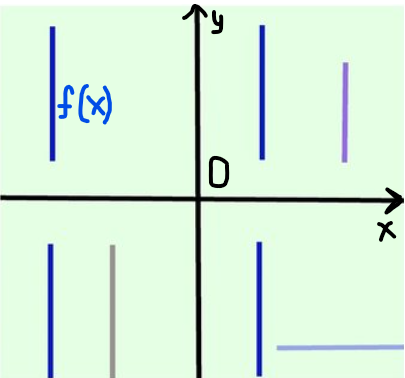

### Question 3: What is a “loss function”? How is it used in optimization?

In machine learning,
- Optimization: finding best set of parameters that minimizes/maximise a given **objective function** while satisfying certain constraints.
- Loss function (cost function/objective function) measures the difference between the predicted model output and true output.  
- Loss function is a typical objective function for optimization: how well the model's predictions align with the actual data
  - Optimization Goal: minimize loss
  - How: adjust parameters

The choice of a loss function:
- Depends on the specific problem and the desired performance metric.
- A good loss function should be differentiable and continuous, so that it can be optimized using different algorithms.

Common examples of loss functions include residual sum of squares (RSS), mean squared error (MSE), cross-entropy loss, and hinge loss.